# Settings

## Libraries

In [1]:
import pandas as pd

# graphics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Datasets

In [3]:
df = pd.read_csv('imdb-reviews.csv')
df

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


# Model

## Adjusting Data

In [5]:
# The machine isnt able to understand text
# so we need to convert it to numbers

In [6]:
# Converting classes to numeric
converting = lambda x: 0 if x == 'neg' else 1
df.sentiment = df.sentiment.apply(converting)

In [7]:
# ex of the new cell
text = ['meu nome e gustavo', 'a idade de gustavo e 20', 'nao sei o seu nome e idade']

vet_test = CountVectorizer()
bag_of_word_test = vet_test.fit_transform(text)  # kind of a pd.value_counts to all words
columns = vet_test.get_feature_names_out()  # return the vocabulary

# the following command will return an error, because its an sparse matrix
# pd.DataFrame(bag_of_word_test, columns=colunas) 

pd.DataFrame.sparse.from_spmatrix(bag_of_word_test, columns=columns)

,20,de,gustavo,idade,meu,nao,nome,sei,seu
0,0,0,1,0,1,0,1,0,0
1,1,1,1,1,0,0,0,0,0
2,0,0,0,1,0,1,1,1,1


In [8]:
# creating a bag of words

# this pandas function will create a column for each word, 
# using Null if the word don't appear, unless of using 0 
# to save memory. When the word appear in the document,
# it will the number of appearences. 

vectorizer = CountVectorizer(max_features=75)  # it will select the n words that most appear
bag_of_words = vectorizer.fit_transform(df.text_pt)  # when vetorizing, the machine auto apply a lower function
columns = vectorizer.get_feature_names_out()

bag_words = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=columns)

In [9]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df.sentiment, test_size=0.2)

# Creating a model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [10]:
# checking accuracy
acuracy = lr_model.score(x_test, y_test)
print(f"the model's acuracy is {round(acuracy, 2)}")

the model's acuracy is 0.69


# Model Analysis

<Figure size 1200x700 with 0 Axes>

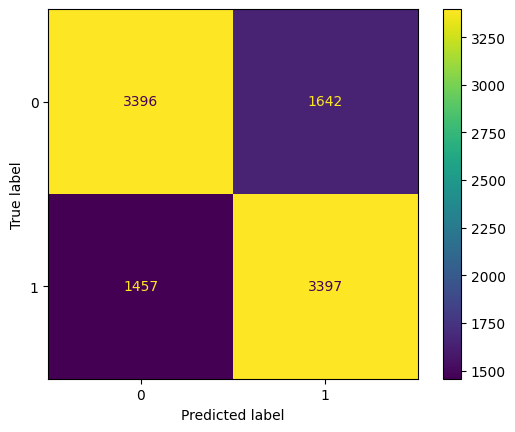

In [11]:
# confusion matrix
y_predict = lr_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(12,7))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict), display_labels=lr_model.classes_).plot()
# sns.heatmap(cm, annot=True)  # annot --> insert values in the graph
plt.show()


# Conclusion

- there are a lot stopwords  
- model isnt good yet  
  
new_version --> remove stopwords